# COURSE: Master math by coding in Python
## SECTION: Linear algebra

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

# VIDEO: Vectors

In [2]:
row_vec = np.array([4,2])
col_vec = np.array([ 
    [-2], 
    [3] ])
print(row_vec)
print('-----------')
print(col_vec)
print('-----------')

[4 2]
-----------
[[-2]
 [ 3]]
-----------


In [3]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# check out the sizes
print(np.shape(row_vec))
print(np.shape(col_vec))

(2,)
(2, 1)


/home/adel/miniconda3/envs/ML_DS/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


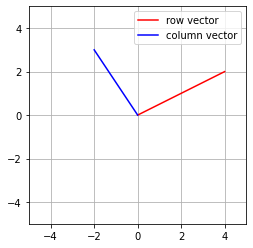

In [5]:
plt.plot([0, row_vec[0]], [0, row_vec[1]], 'r', label='row vector')
plt.plot([0, col_vec[0]], [0, col_vec[1]], 'b', label='column vector')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()

### Exercises

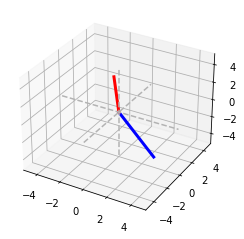

In [6]:
# import 3d plotting tools
from mpl_toolkits.mplot3d import Axes3D


v3_1 = np.array([3,0,-4])
v3_2 = np.array([-1,1,3])

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

# draw vectors
ax.plot([0,v3_1[0]],[0,v3_1[1]],[0,v3_1[2]],'b',linewidth=3)
ax.plot([0,v3_2[0]],[0,v3_2[1]],[0,v3_2[2]],'r',linewidth=3)

# guidelines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

# VIDEO: Adding and scalar-multiplying vectors

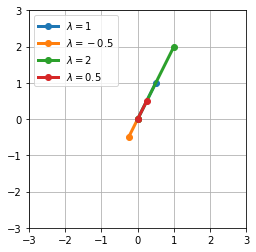

In [7]:
v = np.array([.5,1]) # vector
s = [1,-.5,2,.5] # scalars

for si in s:
    sv = si*v
    plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='$\\lambda=%g$' %(si))
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [8]:
# adding vectors
v1 = np.array([-1,2])
v2 = np.array([1,1])

v3a = v1+v2
v3b = np.add(v1,v2)

v3c = np.zeros(2)
for i in range(0,2):
    v3c[i] = v1[i] + v2[i]

print(v3a,v3b,v3c)

[0 3] [0 3] [0. 3.]


### Exercise

In [9]:
# adding vectors
v1 = np.array([-1,2])
v2 = np.array([1,1])
v3a = v1+v2

<IPython.core.display.Math object>

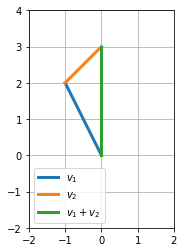

In [10]:
plt.plot([0,v1[0]],[0,v1[1]],label='$v_1$',linewidth=3)
plt.plot([0,v2[0]]+v1[0],[0,v2[1]]+v1[1],label='$v_2$',linewidth=3)
plt.plot([0,v3a[0]],[0,v3a[1]],label='$v_1+v_2$',linewidth=3)

str1 = sym.latex(sym.sympify(v1))
str2 = sym.latex(sym.sympify(v2))
str3 = sym.latex(sym.sympify(v3a))

display(Math('%s+%s=%s' %(str1,str2,str3)))

plt.axis('square')
plt.legend()
plt.axis([-2,2,-2,4])
plt.grid()
plt.show()

# VIDEO: The dot product

In [11]:
v = np.arange(10,20,3)
w = np.arange(5,15,3)
print(w)
dp1 = 0

for i in range(0,len(v)):
    dp1 = dp1 + v[i]*w[i]


[ 5  8 11 14]


In [12]:
dp2 = np.sum( np.multiply(v,w) )
dp3 = np.dot(v,w)
print(dp1,dp2,dp3)

596 596 596


### Exercise

In [13]:
# write a function that takes two vectors, tests whether the dot product is valid between them, and returns the dot product or gives an error message

def mydotproduct(v,w):
    
    # squeeze out singleton dimensions
    v = np.squeeze(v)
    w = np.squeeze(w)
    
    # check whether they are the same size
    if len(v)!=len(w):
        raise ValueError('Vectors must have the same length!')
    
    display(Math('v^Tw = %s' %np.dot(v,w)))
    

In [14]:
v1 = np.random.randn(1,10)
v2 = np.random.randn(10,1)

# np.shape(np.squeeze(v2))

mydotproduct(v1,v2)

<IPython.core.display.Math object>

# VIDEO: Dot product application: Correlation coefficient

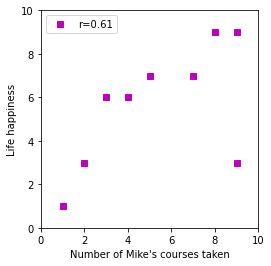

In [16]:
# data
mikes_courses  = [4,5,8,2,9,9,1,3,7]
life_happiness = [6,7,9,3,9,3,1,6,7]

# mean-center
m = mikes_courses - np.mean(mikes_courses)
l = life_happiness - np.mean(life_happiness)

# compute correlation
numer = np.dot(m,l)
denom = np.sqrt( np.dot(m,m) ) * np.sqrt(np.dot(l,l))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(m,l)[1][0]

# show the data!
plt.plot(mikes_courses,life_happiness,'ms',label='r=%s' %np.round(r1,2))

plt.axis([0,10,0,10])
plt.gca().set_aspect('equal')
plt.xlabel('Number of Mike\'s courses taken')
plt.ylabel('Life happiness')
plt.legend()
plt.show()


# VIDEO: The outer product

In [18]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)

np.dot(v1,v2)
# op = np.outer(v1,v2)

ValueError: shapes (50,) and (80,) not aligned: 50 (dim 0) != 80 (dim 0)

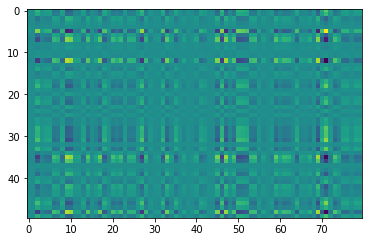

In [19]:
op = np.outer(v1,v2)
# display(Math(sym.latex(sym.sympify(op))))

plt.imshow(op)
plt.show()

### Exercise

In [21]:
v = np.arange(1,11)
w = np.arange(1,6)

print(np.outer(v,w))
print(np.outer(w,v))

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]
 [ 6 12 18 24 30]
 [ 7 14 21 28 35]
 [ 8 16 24 32 40]
 [ 9 18 27 36 45]
 [10 20 30 40 50]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]
 [ 5 10 15 20 25 30 35 40 45 50]]


In [22]:
# show that svw=vsw=vws
s = 4

left = s*np.outer(v,w)
middle = np.outer(v*s,w)
right = np.outer(v,w)*s

print(left-middle)
print(middle-right)
print(left-right)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


# VIDEO: Matrix multiplication

In [1]:
import numpy as np

In [3]:
A = np.random.randn(14,10)
B = np.random.randn(14,10)
C = np.random.randn(10,14)

# print(A@B)
print(A@C)
print(C@A)

print(np.shape(A@C))
print(np.shape(C@A))

[[-2.27061296  4.13535295  3.77771162 -4.65528685 -0.90990148 -3.51461383
   1.87856468  5.69498525 -2.86318656 -2.89338784  1.85029605  6.34280715
  -1.66163866 -2.5728005 ]
 [ 4.05136943  1.92729759 -1.19896427 -2.12776652 -1.18851785  0.23822266
  -0.26157227 -2.49606705  0.55572633 -1.92642686  0.5119024  -4.02130727
   0.3398295   3.05968702]
 [-1.66920949  1.4125324   1.37322762 -0.20532268  2.10306023 -0.19400672
  -0.94396017  2.31284457  0.90274596  2.64149358  3.07464174  5.69731548
  -3.07474014  0.51660465]
 [-0.32522837  0.82845637  0.7954373  -0.63752114  0.75039981 -0.72047457
  -2.59563416  0.40337931  1.34832304 -2.44431417 -0.07849853 -0.89338194
   0.23428402  0.91940469]
 [ 3.65709699  1.61489721 -0.7721048  -0.20743096 -4.84189143 -2.96417962
   3.02224668  2.73389739 -2.81018342  1.00088666  1.12069981  3.65564544
   0.04504321 -2.61959844]
 [-2.07463977 -0.82043381  0.04207501  1.8823873   0.75742836 -1.26157337
  -1.32101112 -3.51709346  2.10400518 -2.32208094 -

### Exercise

In [4]:
def matrixMultiplication(A,B):
    
    # get matrix sizes
    szA = np.shape(A)
    szB = np.shape(B)
    
    # give error if sizes don't match
    if szA[1]!=szB[0]:
        raise ValueError('"Inner" dimensions don''t match!')
    
    # initialize
    C = np.zeros((szA[0],szB[1]))
    
    # compute!
    for i in range(szA[0]):
        for j in range(szB[1]):
            C[i,j] = np.dot(A[i,:],B[:,j])
            
    return C


In [24]:
A = np.random.randn(4,6)
B = np.random.randn(6,4)

C1 = matrixMultiplication(A,B)
C2 = A@B

# print(C1-C2)
print(np.round(C1-C2, 2)) # Due to computer limitation about rounding errors

[[ 0.  0. -0.  0.]
 [ 0. -0.  0.  0.]
 [ 0. -0. -0. -0.]
 [-0.  0.  0. -0.]]


# VIDEO: Transposing matrices and vectors

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
r = np.random.randn(1,10)
c = np.random.randn(10,1)

print(np.shape(r))
print(np.shape(c))

(1, 10)
(10, 1)


In [26]:
r_flip1 = np.transpose(r)
r_flip2 = r.T
print(np.shape(r_flip2))

(10, 1)


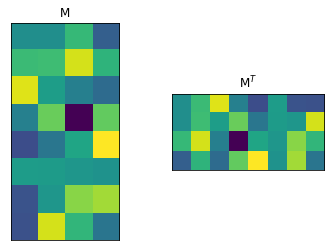

In [28]:
# matrix and image
mat = np.random.randn(8,4)
matT = mat.T

fig,ax = plt.subplots(1,2)
ax[0].imshow(mat)
ax[0].set_title('M')

ax[1].imshow(matT)
ax[1].set_title('M$^T$')

# set common properties
for i in ax:
    i.set_yticks([])
    i.set_xticks([])

plt.show()

### Exercise

In [29]:
# show that a matrix times its transpose is square-symmetric

# sizes
m = 14
n = 19

amat = np.random.randn(m,n)

# palindromic variables! (literal and referent!)
amatama = amat@amat.T

# show it's square
print(np.shape(amatama))

# show it's symmetric
print(amatama - amatama.T)

(14, 14)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# VIDEO: Various special matrices

In [30]:
# identity
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [31]:
# zeros
Z = np.zeros((5,5))
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [32]:
# diagonal
D = np.diag([1,3,2,4,5])
print(D)
d = np.diagonal(D)
print(d)

[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
[1 3 2 4 5]


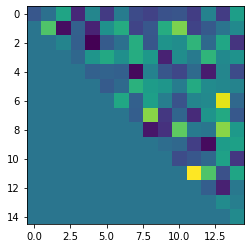

In [36]:
# triangular matrix: Upper
T = np.random.randn(15,15)

plt.imshow(np.triu(T))
plt.show()

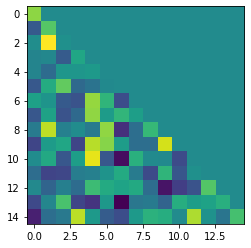

In [37]:
# triangular matrix: Lower
T = np.random.randn(15,15)

plt.imshow(np.tril(T))
plt.show()

### Exercise

In [38]:
# matrix of random integers
intmat = np.random.randint(-4,5,(4,4))
I4 = np.eye(4)
upper4 = np.triu(np.random.randn(4,4))

print(intmat.dtype)
print('\n\n')
print((intmat@I4).dtype)
print('\n\n')
print(intmat@upper4)

int64



float64



[[ 0.20045438  1.14915146  5.56750677 -5.48961781]
 [ 0.60136313  1.77093226 -6.57293819 11.0016996 ]
 [-0.20045438 -0.52045566  3.63966138 -6.8946199 ]
 [ 0.40090875  1.35525923 -2.67573869 -5.62520788]]


[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


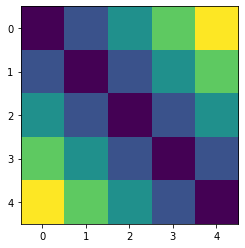

In [39]:
# figure out what a Toeplitz matrix is
from scipy.linalg import toeplitz

v = np.arange(1,6)
toe = toeplitz(v)

print(toe)

plt.imshow(toe)
plt.show()

# VIDEO: Matrix inverse

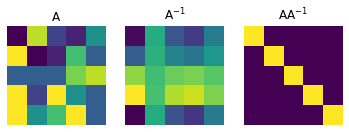

In [40]:
# random matrices are nearly always invertible

m = 5

A = np.random.randint(-5,6,(m,m))
Ainv = np.linalg.inv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{-1}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{-1}$')

for i in ax:
    i.axis('off')

plt.show()

In [42]:
# ERROR: Matrix must be squared

A = np.random.randint(-5,6,(m,m+1))
A[:,0] = A[:,1]
print(A)

Ainv = np.linalg.inv(A)

[[ 0  0 -3  4  4 -2]
 [ 4  4  1 -2  0  0]
 [ 5  5  5 -2  4 -3]
 [ 5  5 -4  4 -4  1]
 [ 1  1 -2  4  2 -3]]


LinAlgError: Last 2 dimensions of the array must be square

In [41]:
# Error: also no inverse for square matrix with repeated columns

A = np.random.randint(-5,6,(m,m))
A[:,0] = A[:,1]
print(A)

Ainv = np.linalg.inv(A)


[[-2 -2 -2  3 -5]
 [ 2  2  2 -4 -2]
 [ 0  0 -5  5 -1]
 [-2 -2  3 -3 -1]
 [ 2  2  2  3  3]]


LinAlgError: Singular matrix

### Exercise

[[-3 -3  3 -2  4]
 [ 3  3 -2 -4 -1]
 [ 1  1 -4  0 -3]
 [ 1  1  0 -3 -2]
 [ 5  5 -1 -5 -5]]


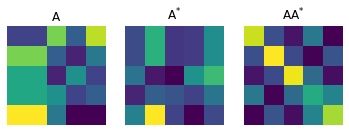

In [43]:
# Ex1:
# pinv with repeated column in square matrix, and with non-square matrix
m = 5
A = np.random.randint(-m, m+1, (m,m))
A[:,0] = A[:,1]
print(A)

# A = np.random.randn(m,m+2)

# compute pseudo-inverse
Ainv = np.linalg.pinv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{*}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{*}$')

for i in ax:
    i.axis('off')

plt.show()

[[ 0.29031993 -0.2783689   0.03971719 -0.72520912  0.94419226  0.76817793
  -0.40499194]
 [-0.34868796  1.17071586 -0.2325772  -0.17446813 -1.29085584 -0.24615341
  -0.24716036]
 [ 2.34603544  1.85527605  1.11396042  0.26086516 -1.53976491  1.23165577
   0.13190917]
 [-1.57274572 -1.65335277 -1.04347234 -1.08841462  1.3958871  -0.91734216
   0.31358256]
 [ 0.79147068  0.02258431  0.79533658  0.21908116  1.28044722  0.17659544
  -1.15976558]]


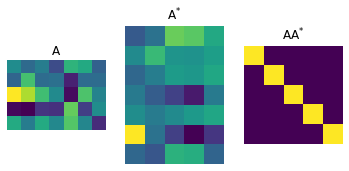

In [44]:
# Ex2:
m = 5
A = np.random.randn(m,m+2)

print(A)

# 

# compute pseudo-inverse
Ainv = np.linalg.pinv(A)

fig,ax = plt.subplots(1,3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('A$^{*}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('AA$^{*}$')

for i in ax:
    i.axis('off')

plt.show()

# VIDEO: Solving a system of equations

In [45]:
X = np.array([ [2,1,-1],[3,4,2],[1,-5,-2] ])
y = np.array([1,13,0])

b = np.linalg.inv(X.T@X) @ (X.T@y)
b

array([ 3., -1.,  4.])

In [46]:
b = np.linalg.solve(X,y)
b

array([ 3., -1.,  4.])

### Exercise

In [47]:
# visualize the three possible outcomes of simultaneous equations

# 1) one solution
X1 = np.array([ [3,-1],[-1,1] ])
y1 = np.array([6,2])

# 2) infinite solutions
X2 = np.array([ [3,-1],[1.5,-.5] ])
y2 = np.array([6,3])

# 3) no solutions
X3 = np.array([ [3,-1],[1.5,-.5] ])
y3 = np.array([6,2])

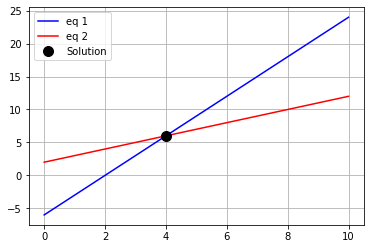

In [48]:
### generate the plot
xlim = np.array([0,10])

# 1) Case 1: one unique solution

# convert equations into y=mx+b form
yy1 = -X1[0,0]/X1[0,1]*xlim + y1[0]/X1[0,1]
yy2 = -X1[1,0]/X1[1,1]*xlim + y1[1]/X1[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r',label='eq 2')

# solve and plot
b1 = np.linalg.solve(X1,y1)
plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

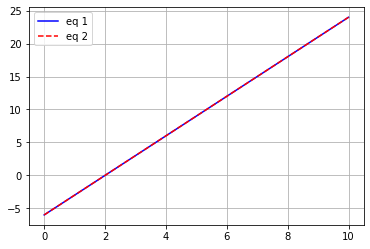

In [51]:
# Case 2: infinite solutions

# convert equations into y=mx+b form
yy1 = -X2[0,0]/X2[0,1]*xlim + y2[0]/X2[0,1]
yy2 = -X2[1,0]/X2[1,1]*xlim + y2[1]/X2[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r--',label='eq 2')

# solve and plot ---> Two lines are the same: INFINITE NUMBER OF SOLUTIONS
# b1 = np.linalg.solve(X2,y2)
# plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

LinAlgError: Singular matrix

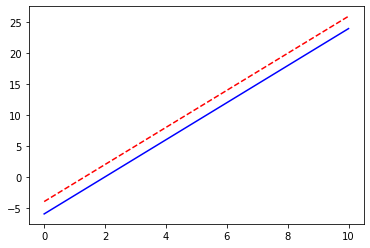

In [53]:
# Case 3: no solutions

# convert equations into y=mx+b form
yy1 = -X3[0,0]/X3[0,1]*xlim + y3[0]/X3[0,1]
yy2 = -X3[1,0]/X3[1,1]*xlim + y3[1]/X3[1,1]

# plot
plt.plot(xlim,yy1,'b',label='eq 1')
plt.plot(xlim,yy2,'r--',label='eq 2')

# solve and plot ---> TWO LINES ARE PARALLEL: No solution
b1 = np.linalg.solve(X3,y3)
plt.plot(b1[0],b1[1],'ko',markersize=10,label='Solution')

plt.legend()
plt.grid()
plt.show()

# VIDEO: Visualizing matrix-vector multiplication

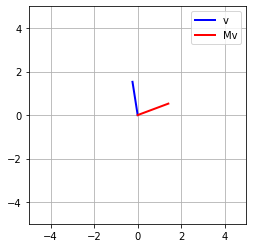

In [58]:
M = np.array([ [.5,1],
               [1,.5] ])

v = np.array([1,2])
v = np.random.randn(2)
# v = np.array([1,1])
# v = np.array([1,-1])

Mv = M@v

plt.plot([0,v[0]],[0,v[1]],'b',label='v',linewidth=2)
plt.plot([0,Mv[0]],[0,Mv[1]],'r',label='Mv',linewidth=2)

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.legend()
plt.grid()

plt.show()

### Exercise

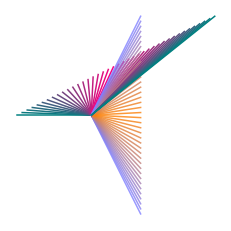

In [59]:
v1 = np.linspace(-2,2,40)

for i in v1:
    
    v = np.array([1,i])
    Mv = M@v
    plt.plot([0,v[0]],[0,v[1]],color=[1-abs(i)/4,.5,abs(i)/2],alpha=.8)
    plt.plot([0,Mv[0]],[0,Mv[1]],color=[1-abs(i)/2,abs(i)/4,.5])
    

plt.axis('square')
plt.axis('off')
plt.show()

# VIDEO: Eigenvalues and eigenvectors

[128.83278558  69.61560314   7.93248192  25.78087845  17.83825091]


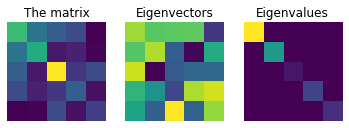

In [60]:
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)
print(eigvals)

# visualize the matrices
fig,ax = plt.subplots(1,3)

ax[0].imshow(M)
ax[0].set_title('The matrix')

ax[1].imshow(eigvecs)
ax[1].set_title('Eigenvectors')

ax[2].imshow(np.diag(eigvals))
ax[2].set_title('Eigenvalues')

for i in ax:
    i.axis('off')

plt.show()

In [61]:
# but what do they mean??

Mv = M@eigvecs[:,0]
lv = eigvals[0] * eigvecs[:,0]

print(Mv)
print(lv)

[72.55138986 49.25309626 84.81770105 35.44609866 21.39735162]
[72.55138986 49.25309626 84.81770105 35.44609866 21.39735162]


### Exercise

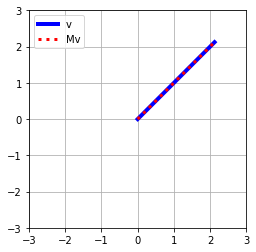

In [65]:
# part 1: 2x2 symmetric matrix. plot Mv and lv 

M = np.array([ [1,2],[2,1] ])
d,V = np.linalg.eig(M)

lv = d[0]*V[:,0] # change to 1 without changing d
Mv = M@V[:,0]

plt.plot([0,lv[0]],[0,lv[1]],'b',label='v',linewidth=4)
plt.plot([0,Mv[0]],[0,Mv[1]],'r:',label='Mv',linewidth=3)

plt.axis('square')
plt.axis([-3,3,-3,3])
plt.legend()
plt.grid()

plt.show()

In [67]:
# part 2: 6x6 symmetric matrix. compute all pairwise dot products of eigenvectors

# the matrix
m = 6
M = np.random.randn(m,m)
M = M@M.T # For the symetric matrix

# its eigendecomposition
d,V = np.linalg.eig(M)

dps = np.zeros((m,m))

for i in range(0,m):
    for j in range(0,m):
        dps[i,j] = np.dot(V[:,i],V[:,j])
        
print(np.round(dps,5))

[[ 1.  0.  0. -0.  0.  0.]
 [ 0.  1. -0. -0.  0. -0.]
 [ 0. -0.  1.  0.  0.  0.]
 [-0. -0.  0.  1. -0. -0.]
 [ 0.  0.  0. -0.  1. -0.]
 [ 0. -0.  0. -0. -0.  1.]]


# VIDEO: Singular value decomposition

### Exercise

# Linear algebra BUG HUNT!!